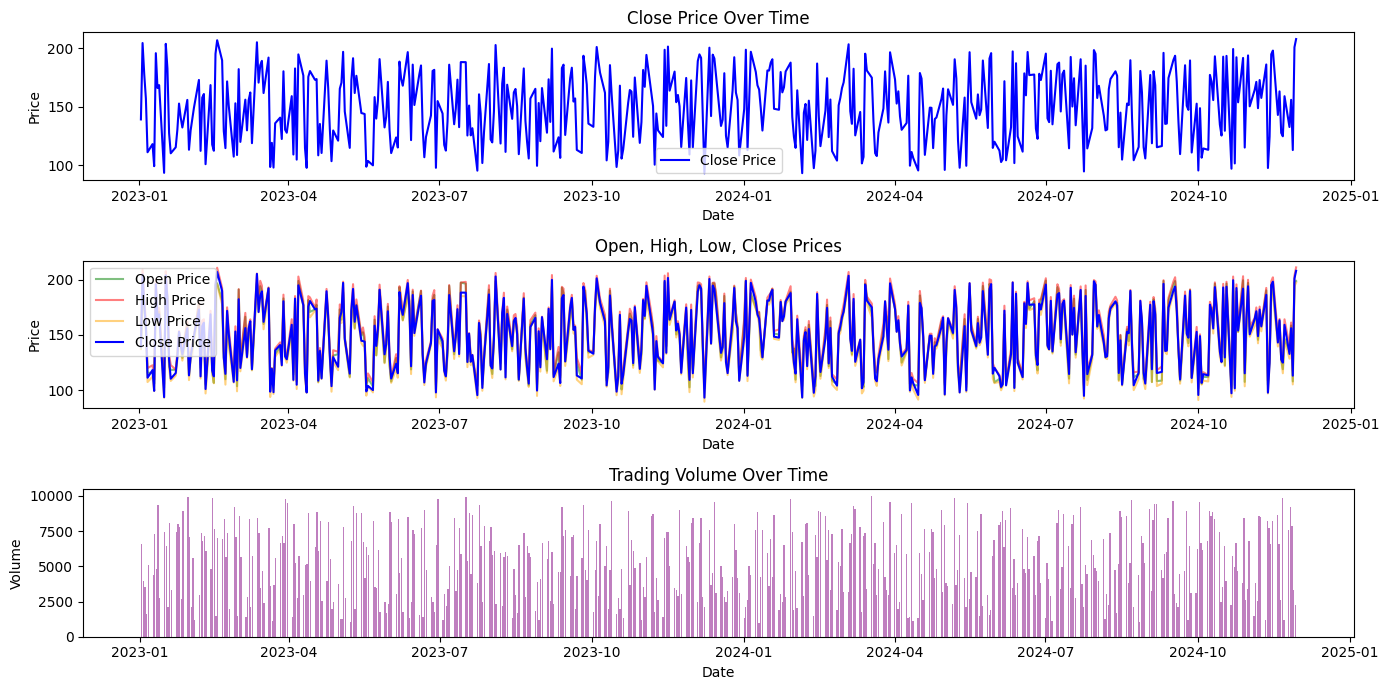

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the CSV file
data = pd.read_csv('/content/apple_stock_data.csv')

# 2. Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# 3. Set 'Date' as the index
data.set_index('Date', inplace=True)

# 4. EDA Visualizations
plt.figure(figsize=(14, 7))

# Plotting Closing Prices
plt.subplot(3, 1, 1)
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plotting Open, High, Low, Close Prices
plt.subplot(3, 1, 2)
plt.plot(data['Open'], label='Open Price', color='green', alpha=0.5)
plt.plot(data['High'], label='High Price', color='red', alpha=0.5)
plt.plot(data['Low'], label='Low Price', color='orange', alpha=0.5)
plt.plot(data['Close'], label='Close Price', color='blue', alpha=1.0)
plt.title('Open, High, Low, Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plotting Volume
plt.subplot(3, 1, 3)
plt.bar(data.index, data['Volume'], color='purple', alpha=0.5)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

plt.tight_layout()
plt.show()


In [17]:
import pandas as pd

# Data Loading and Preprocessing
def load_and_preprocess_data(apple_path):
    # Read CSV file
    apple_df = pd.read_csv('/content/apple_stock_data.csv')

    # Convert Date to datetime with mixed format handling
    def parse_date(date_str):
        try:
            return pd.to_datetime(date_str, format='%m-%d-%Y')
        except:
            try:
                return pd.to_datetime(date_str, format='%m/%d/%Y')
            except:
                return pd.to_datetime(date_str)

    apple_df['Date'] = apple_df['Date'].apply(parse_date)

    # Set Date as index
    apple_df.set_index('Date', inplace=True)

    # Sort by date
    apple_df.sort_index(inplace=True)

    # Convert numeric columns and handle any formatting issues
    numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

    for col in numeric_columns:
        # Remove any commas and convert to numeric
        apple_df[col] = pd.to_numeric(apple_df[col].astype(str).str.replace(',', ''), errors='coerce')

    return apple_df

# Create features for the model
def create_features(df):
    df = df.copy()

    # Technical indicators
    # 1. Moving averages
    df['MA5'] = df['Close'].rolling(window=5).mean()
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['MA50'] = df['Close'].rolling(window=50).mean()

    # 2. RSI (Relative Strength Index)
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    df['momentum'] = df['Close'] - df['Close'].shift(4)

    # 6. Volume features
    df['volume_ma5'] = df['Volume'].rolling(window=5).mean()
    df['volume_ma20'] = df['Volume'].rolling(window=20).mean()

    # 7. Price variance
    df['price_variance'] = df['Close'].rolling(window=5).std()

    # 8. Returns
    df['daily_return'] = df['Close'].pct_change()

    # Drop NaN values
    df = df.dropna()

    return df

# Load your data
print("Loading data...")
apple_df = load_and_preprocess_data('apple.csv')

# Create features
apple_features = create_features(apple_df)

# Print first few rows to verify data loading and feature creation
print("\nFirst few rows of Apple data with features:")
print(apple_features.head())


Loading data...


<ipython-input-17-17d2bf81d8c8>:16: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.to_datetime(date_str)



First few rows of Apple data with features:
                  Open       Close        High         Low  Volume  \
Date                                                                 
2023-03-11  184.922341  194.306320  197.464121  182.197206  5658.0   
2023-03-13  196.958463  205.101540  205.330251  195.120791  8418.0   
2023-03-14  177.513282  170.612775  181.870966  170.271914  7362.0   
2023-03-15  193.949894  185.432982  198.817339  185.303922  3454.0   
2023-03-16  189.482735  189.204996  194.327124  188.529165  4674.0   

                   MA5        MA20        MA50        RSI   momentum  \
Date                                                                   
2023-03-11  166.192484  155.600306  146.752440  57.321935  23.716202   
2023-03-13  173.094768  159.973844  148.258152  60.265356  60.855854   
2023-03-14  178.368186  162.884401  149.495788  49.875953  24.551958   
2023-03-15  186.242619  162.394742  150.784273  54.194106   9.673505   
2023-03-16  188.931723  161.5116

<ipython-input-17-17d2bf81d8c8>:62: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['daily_return'] = df['Close'].pct_change()


Loading data...

Creating features...

Normalizing data...


<ipython-input-45-f23571b1a3e2>:109: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


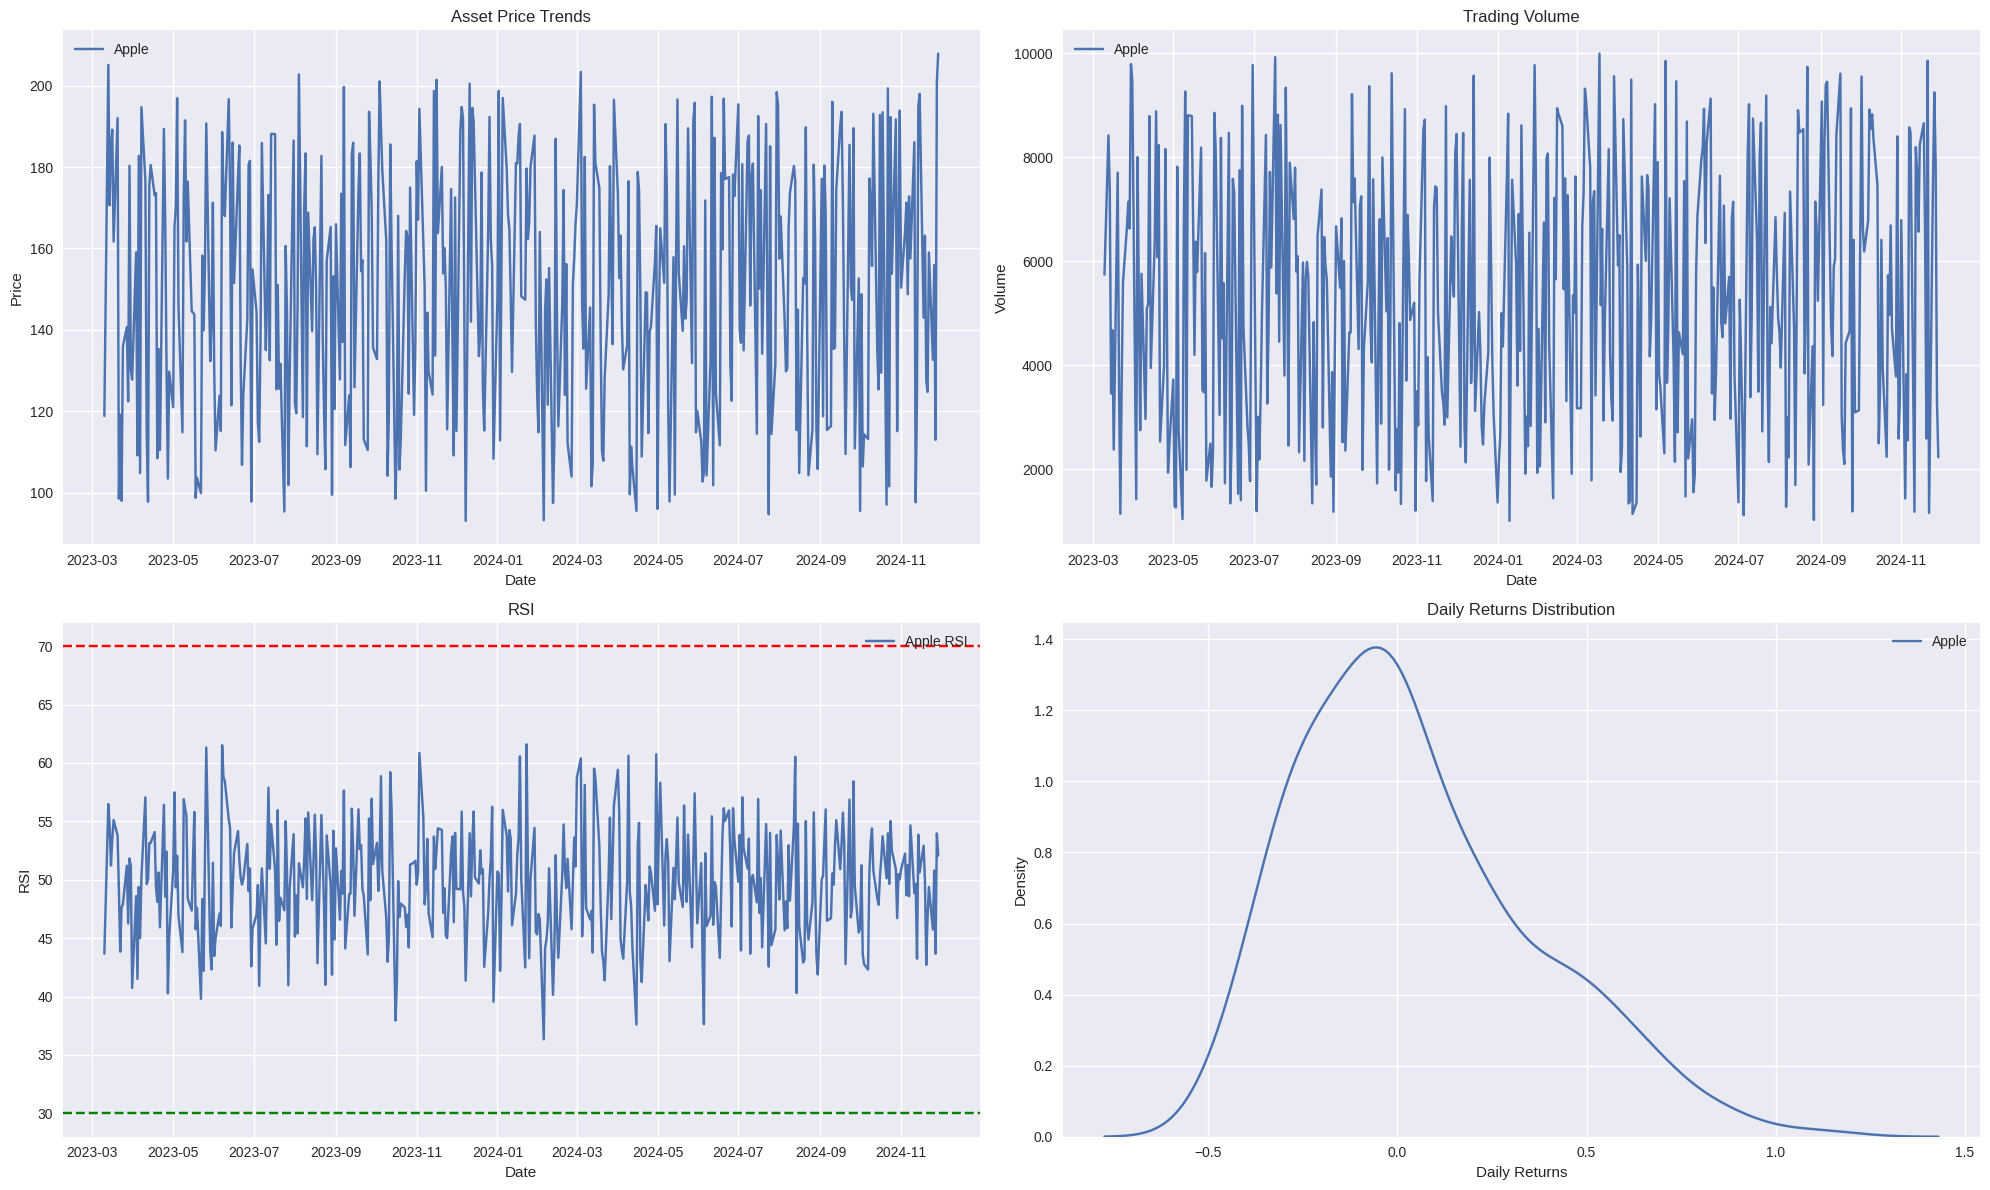


Apple Stock Summary Statistics:
            Close       Volume         RSI  daily_return
count  451.000000   451.000000  451.000000    451.000000
mean   150.326434  5275.711752   49.878145      0.044473
std     30.577487  2525.308125    4.732561      0.312115
min     93.083339  1006.000000   36.340218     -0.498349
25%    124.224623  3003.000000   46.600930     -0.193459
50%    151.023463  5152.000000   50.031877     -0.008041
75%    177.036263  7503.000000   53.217204      0.230120
max    207.854611  9988.000000   61.596669      1.153765

Apple Features Correlation:
                 Close       RSI      MACD  momentum  daily_return
Close         1.000000  0.691737  0.622497  0.740173      0.664637
RSI           0.691737  1.000000  0.529758  0.503183      0.417217
MACD          0.622497  0.529758  1.000000  0.326432      0.058981
momentum      0.740173  0.503183  0.326432  1.000000      0.476698
daily_return  0.664637  0.417217  0.058981  0.476698      1.000000

Processed data has bee

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Data Loading and Preprocessing
def load_and_preprocess_data(apple_path):
    # Read CSV file
    apple_df = pd.read_csv('/content/apple_stock_data.csv')

    # Convert Date to datetime with mixed format handling
    def parse_date(date_str):
        try:
            return pd.to_datetime(date_str, format='%m-%d-%Y')
        except:
            try:
                return pd.to_datetime(date_str, format='%m/%d/%Y')
            except:
                return pd.to_datetime(date_str)

    apple_df['Date'] = apple_df['Date'].apply(parse_date)

    # Set Date as index
    apple_df.set_index('Date', inplace=True)

    # Sort by date
    apple_df.sort_index(inplace=True)

    # Convert numeric columns and handle any formatting issues
    numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

    for col in numeric_columns:
        # Remove any commas and convert to numeric
        apple_df[col] = pd.to_numeric(apple_df[col].astype(str).str.replace(',', ''), errors='coerce')

    return apple_df

# Create features for the model
def create_features(df):
    df = df.copy()

    # Technical indicators
    # 1. Moving averages
    df['MA5'] = df['Close'].rolling(window=5).mean()
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['MA50'] = df['Close'].rolling(window=50).mean()

    # 2. RSI (Relative Strength Index)
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # 3. MACD
    exp1 = df['Close'].ewm(span=12, adjust=False).mean()
    exp2 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = exp1 - exp2
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # 4. Bollinger Bands
    df['BB_middle'] = df['Close'].rolling(window=20).mean()
    df['BB_upper'] = df['BB_middle'] + 2 * df['Close'].rolling(window=20).std()
    df['BB_lower'] = df['BB_middle'] - 2 * df['Close'].rolling(window=20).std()

    # 5. Price momentum
    df['momentum'] = df['Close'] - df['Close'].shift(4)

    # 6. Volume features
    df['volume_ma5'] = df['Volume'].rolling(window=5).mean()
    df['volume_ma20'] = df['Volume'].rolling(window=20).mean()

    # 7. Price variance
    df['price_variance'] = df['Close'].rolling(window=5).std()

    # 8. Returns
    df['daily_return'] = df['Close'].pct_change()

    # Drop NaN values
    df = df.dropna()

    return df

# Load your data
print("Loading data...")
apple_df = load_and_preprocess_data('apple.csv')

# Create features
print("\nCreating features...")
apple_df_featured = create_features(apple_df)

# Normalize the data
def normalize_data(df):
    scaler = MinMaxScaler()
    feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume',
                       'MA5', 'MA20', 'MA50', 'RSI', 'MACD', 'Signal_Line',
                       'BB_middle', 'BB_upper', 'BB_lower', 'momentum',
                       'volume_ma5', 'volume_ma20', 'price_variance', 'daily_return']

    normalized_data = pd.DataFrame(scaler.fit_transform(df[feature_columns]),
                                   columns=feature_columns,
                                   index=df.index)
    return normalized_data, scaler

print("\nNormalizing data...")
apple_scaled, apple_scaler = normalize_data(apple_df_featured)

# Exploratory Data Analysis
plt.style.use('seaborn')
fig = plt.figure(figsize=(20, 12))

# 1. Price Trends
plt.subplot(2, 2, 1)
plt.title('Asset Price Trends')
plt.plot(apple_df_featured.index, apple_df_featured['Close'], label='Apple')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# 2. Volume Analysis
plt.subplot(2, 2, 2)
plt.title('Trading Volume')
plt.plot(apple_df_featured.index, apple_df_featured['Volume'], label='Apple')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

# 3. RSI Comparison
plt.subplot(2, 2, 3)
plt.title('RSI')
plt.plot(apple_df_featured.index, apple_df_featured['RSI'], label='Apple RSI')
plt.axhline(y=70, color='r', linestyle='--')
plt.axhline(y=30, color='g', linestyle='--')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()

# 4. Daily Returns Distribution
plt.subplot(2, 2, 4)
plt.title('Daily Returns Distribution')
sns.kdeplot(data=apple_df_featured['daily_return'], label='Apple')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nApple Stock Summary Statistics:")
print(apple_df_featured[['Close', 'Volume', 'RSI', 'daily_return']].describe())

# Calculate correlations
print("\nApple Features Correlation:")
correlation_matrix = apple_df_featured[['Close', 'RSI', 'MACD', 'momentum', 'daily_return']].corr()
print(correlation_matrix)

# Save processed data for next steps
apple_scaled.to_csv('apple_processed.csv')

print("\nProcessed data has been saved to 'apple_processed.csv'")


Episode: 1/10, Total Profit: 10.94873438987305, Epsilon: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

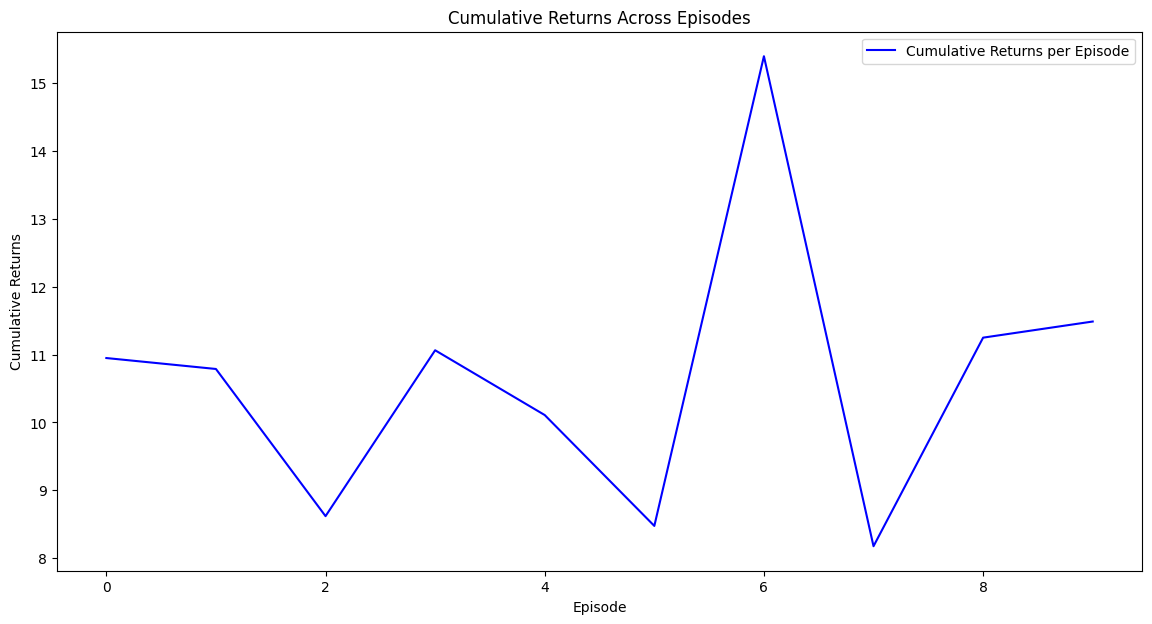

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


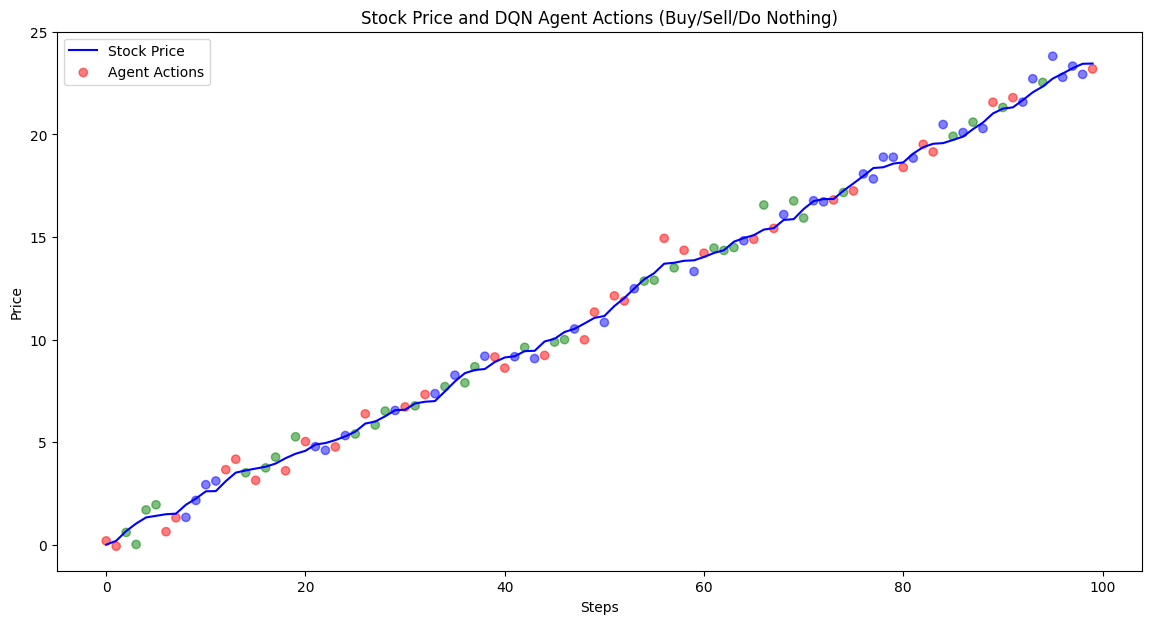

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

data = pd.read_csv('/content/apple_processed.csv')

# 2. Modified Environment with 3 Actions
class StockEnv:
    def __init__(self, data):
        self.data = data
        self.n_steps = len(data)
        self.current_step = 0
        self.action_space = [0, 1, 2]  # 0: Do nothing, 1: Buy, 2: Sell
        self.state_size = 1
        self.holding = False  # Track if we are holding a stock
        self.buy_price = 0  # Track the price at which stock was bought

    def reset(self):
        self.current_step = 0
        self.holding = False
        self.buy_price = 0
        return self.data['Close'].iloc[self.current_step]

    def step(self, action):
        reward = 0
        self.current_step += 1
        done = False

        if self.current_step >= self.n_steps:
            done = True
            self.current_step = self.n_steps - 1

        current_price = self.data['Close'].iloc[self.current_step]

        # Define rewards based on actions
        if action == 1 and not self.holding:  # Buy
            self.holding = True
            self.buy_price = current_price
        elif action == 2 and self.holding:  # Sell
            reward = current_price - self.buy_price  # Profit or loss
            self.holding = False
        elif action == 0:  # Do Nothing
            reward = 0  # No change in reward for doing nothing

        next_state = self.data['Close'].iloc[self.current_step]
        return next_state, reward, done

# 3. Modified DQN Agent
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Input(shape=(self.state_size,)))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.choice(range(self.action_size))
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target += self.gamma * np.max(self.model.predict(next_state))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# 4. Train the DQN Agent and Track Cumulative Returns
env = StockEnv(data)
agent = DQNAgent(state_size=1, action_size=3)
cumulative_returns = []

episodes = 10
for e in range(episodes):
    state = env.reset()
    state = np.reshape(state, [1, 1])
    total_profit = 0

    for time in range(len(data)):
        action = agent.act(state)
        next_state, reward, done = env.step(action)
        next_state = np.reshape(next_state, [1, 1])
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_profit += reward  # Accumulate profit for cumulative returns
        if done:
            break
    cumulative_returns.append(total_profit)  # Store profit for each episode
    print(f"Episode: {e + 1}/{episodes}, Total Profit: {total_profit}, Epsilon: {agent.epsilon:.2f}")
    if len(agent.memory) > 32:
        agent.replay(32)

    def predict_next_week(agent, env, current_price, days=7):
        predicted_prices = []
        state = np.reshape(current_price, [1, 1])  # Reshape current price

        for _ in range(days):
            action = agent.act(state)  # Get action from the agent
            next_state, reward, done = env.step(action)  # Step in the environment
            predicted_prices.append(next_state)  # Store predicted price
            state = np.reshape(next_state, [1, 1])  # Update state

        return predicted_prices

# Get the last known price from the data
last_price = data['Close'].iloc[-1]

# Predict for the next week (7 days)
predicted_prices = predict_next_week(agent, env, last_price, days=7)

# Prepare dates for the next week
next_week_dates = [dates[-1] + timedelta(days=i) for i in range(1, 8)]

# 5. Visualize Results
plt.figure(figsize=(14, 7))
plt.plot(cumulative_returns, label='Cumulative Returns per Episode', color='blue')
plt.title('Cumulative Returns Across Episodes')
plt.xlabel('Episode')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# 6. Plot Stock Prices and Agent Actions
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Stock Price', color='blue')

actions = []
state = env.reset()
for _ in range(len(data)):
    action = agent.act(np.reshape(state, [1, 1]))
    actions.append(action)
    state, _, _ = env.step(action)

# Add random jitter to the y-values of the agent's actions
jitter = np.random.normal(0, 0.5, size=len(actions))

# Convert actions to colors for visualization
plt.scatter(data.index, data['Close'] + jitter,
            c=['red' if a == 1 else 'blue' if a == 2 else 'green' for a in actions],
            label='Agent Actions', alpha=0.5)
plt.title('Stock Price and DQN Agent Actions (Buy/Sell/Do Nothing)')
plt.xlabel('Steps')
plt.ylabel('Price')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

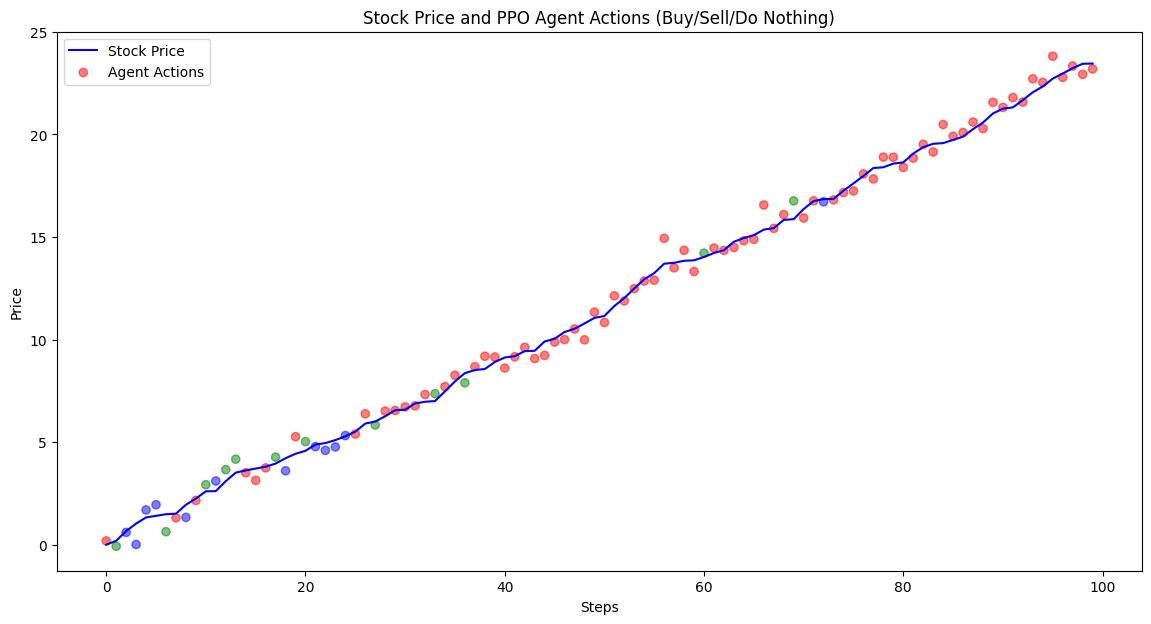

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
import random

data = pd.read_csv('/content/apple_processed.csv')

class StockEnv:
    def __init__(self, data):
        self.data = data
        self.n_steps = len(data)
        self.current_step = 0
        self.action_space = [0, 1, 2]  # 0: Do nothing, 1: Buy, 2: Sell
        self.state_size = 1
        self.holding = False  # Track if we are holding a stock
        self.buy_price = 0  # Track the price at which stock was bought

    def reset(self):
        self.current_step = 0
        self.holding = False
        self.buy_price = 0
        return self.data['Close'].iloc[self.current_step]

    def step(self, action):
        reward = 0
        self.current_step += 1
        done = False

        if self.current_step >= self.n_steps:
            done = True
            self.current_step = self.n_steps - 1

        current_price = self.data['Close'].iloc[self.current_step]

        # Define rewards based on actions
        if action == 1 and not self.holding:  # Buy
            self.holding = True
            self.buy_price = current_price
        elif action == 2 and self.holding:  # Sell
            reward = current_price - self.buy_price  # Profit or loss
            self.holding = False
        elif action == 0:  # Do Nothing
            reward = 0  # No change in reward for doing nothing

        next_state = self.data['Close'].iloc[self.current_step]
        return next_state, reward, done

# PPO Agent setup
class PPOAgent:
    def __init__(self, state_size, action_size, gamma=0.95, lr=0.001, clip_epsilon=0.2):
        self.state_size = state_size
        self.action_size = action_size
        self.gamma = gamma
        self.clip_epsilon = clip_epsilon
        self.lr = lr

        # Build networks
        self.actor = self.build_actor()
        self.critic = self.build_critic()
        self.actor_optimizer = tf.keras.optimizers.Adam(learning_rate=self.lr)
        self.critic_optimizer = tf.keras.optimizers.Adam(learning_rate=self.lr)


    def build_actor(self):
        inputs = Input(shape=(self.state_size,))
        x = Dense(24, activation="relu")(inputs)
        x = Dense(24, activation="relu")(x)
        action_probs = Dense(self.action_size, activation="softmax")(x)
        return Model(inputs, action_probs)

    def build_critic(self):
        inputs = Input(shape=(self.state_size,))
        x = Dense(24, activation="relu")(inputs)
        x = Dense(24, activation="relu")(x)
        value = Dense(1, activation="linear")(x)
        return Model(inputs, value)

    def select_action(self, state):
        state = np.reshape(state, [1, self.state_size])
        action_probs = self.actor.predict(state)[0]
        action = np.random.choice(self.action_size, p=action_probs)
        return action

    def compute_advantage(self, rewards, values):
        advantage = np.zeros_like(rewards)
        last_advantage = 0
        for t in reversed(range(len(rewards))):
            delta = rewards[t] + self.gamma * (values[t + 1] if t + 1 < len(values) else 0) - values[t]
            advantage[t] = last_advantage = delta + self.gamma * last_advantage
        return advantage

    def train(self, states, actions, rewards, old_probs, advantages):
        states = np.array(states)
        actions = np.array(actions)
        old_probs = np.array(old_probs)
        advantages = np.array(advantages)

        # Update actor (policy)
        with tf.GradientTape() as tape:
            new_probs = self.actor(states, training=True)
            new_probs = tf.reduce_sum(new_probs * tf.one_hot(actions, self.action_size), axis=1)
            ratio = new_probs / (old_probs + 1e-10)
            clipped_ratio = tf.clip_by_value(ratio, 1 - self.clip_epsilon, 1 + self.clip_epsilon)
            loss_actor = -tf.reduce_mean(tf.minimum(ratio * advantages, clipped_ratio * advantages))
        grads = tape.gradient(loss_actor, self.actor.trainable_variables)
        self.actor_optimizer.apply_gradients(zip(grads, self.actor.trainable_variables))

        # Update critic (value)
        with tf.GradientTape() as tape:
            values = self.critic(states, training=True)
            loss_critic = tf.reduce_mean(tf.square(rewards - values))
        grads = tape.gradient(loss_critic, self.critic.trainable_variables)
        self.critic_optimizer.apply_gradients(zip(grads, self.critic.trainable_variables))

# Training loop
env = StockEnv(data)
agent = PPOAgent(state_size=1, action_size=3)

episodes = 10
for e in range(episodes):
    states, actions, rewards, values, old_probs = [], [], [], [], []
    state = env.reset()
    total_profit = 0

    for _ in range(len(data)):
        action = agent.select_action(state)
        action_prob = agent.actor.predict(np.reshape(state, [1, 1]))[0][action]
        next_state, reward, done = env.step(action)

        states.append(state)
        actions.append(action)
        rewards.append(reward)
        old_probs.append(action_prob)
        values.append(agent.critic.predict(np.reshape(state, [1, 1]))[0][0])

        total_profit += reward
        state = next_state
        if done:
            break

    # Calculate advantages
    advantages = agent.compute_advantage(rewards, values)

    # Train PPO agent
    agent.train(states, actions, rewards, old_probs, advantages)
    print(f"Episode: {e + 1}/{episodes}, Total Profit: {total_profit}")

    def predict_next_week(agent, env, current_price, days=7):
    predicted_prices = []
    state = np.reshape(current_price, [1, 1])  # Reshape current price

    for _ in range(days):
        action = agent.act(state)  # Get action from the agent
        next_state, reward, done = env.step(action)  # Step in the environment
        predicted_prices.append(next_state)  # Store predicted price
        state = np.reshape(next_state, [1, 1])  # Update state

    return predicted_prices

# Get the last known price from the data
last_price = data['Close'].iloc[-1]

# Predict for the next week (7 days)
predicted_prices = predict_next_week(agent, env, last_price, days=7)

# Prepare dates for the next week
next_week_dates = [dates[-1] + timedelta(days=i) for i in range(1, 8)]
# Visualization
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Stock Price', color='blue')

actions = []
state = env.reset()
for _ in range(len(data)):
    action = agent.select_action(state)
    actions.append(action)
    state, _, _ = env.step(action)

# Add random jitter to the y-values of the agent's actions
jitter = np.random.normal(0, 0.5, size=len(actions))

# Convert actions to colors for visualization
plt.scatter(data.index, data['Close'] + jitter,
            c=['red' if a == 1 else 'blue' if a == 2 else 'green' for a in actions],
            label='Agent Actions', alpha=0.5)
plt.title('Stock Price and PPO Agent Actions (Buy/Sell/Do Nothing)')
plt.xlabel('Steps')
plt.ylabel('Price')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


<ipython-input-22-6af1960685cc>:81: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  target_f[0][0] = target


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

<ipython-input-22-6af1960685cc>:81: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  target_f[0][0] = target


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

<ipython-input-22-6af1960685cc>:81: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  target_f[0][0] = target


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

<ipython-input-22-6af1960685cc>:81: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  target_f[0][0] = target


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

<ipython-input-22-6af1960685cc>:81: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  target_f[0][0] = target


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

<ipython-input-22-6af1960685cc>:81: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  target_f[0][0] = target


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

<ipython-input-22-6af1960685cc>:81: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  target_f[0][0] = target


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

<ipython-input-22-6af1960685cc>:81: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  target_f[0][0] = target


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

<ipython-input-22-6af1960685cc>:81: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  target_f[0][0] = target


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

<ipython-input-22-6af1960685cc>:81: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  target_f[0][0] = target


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

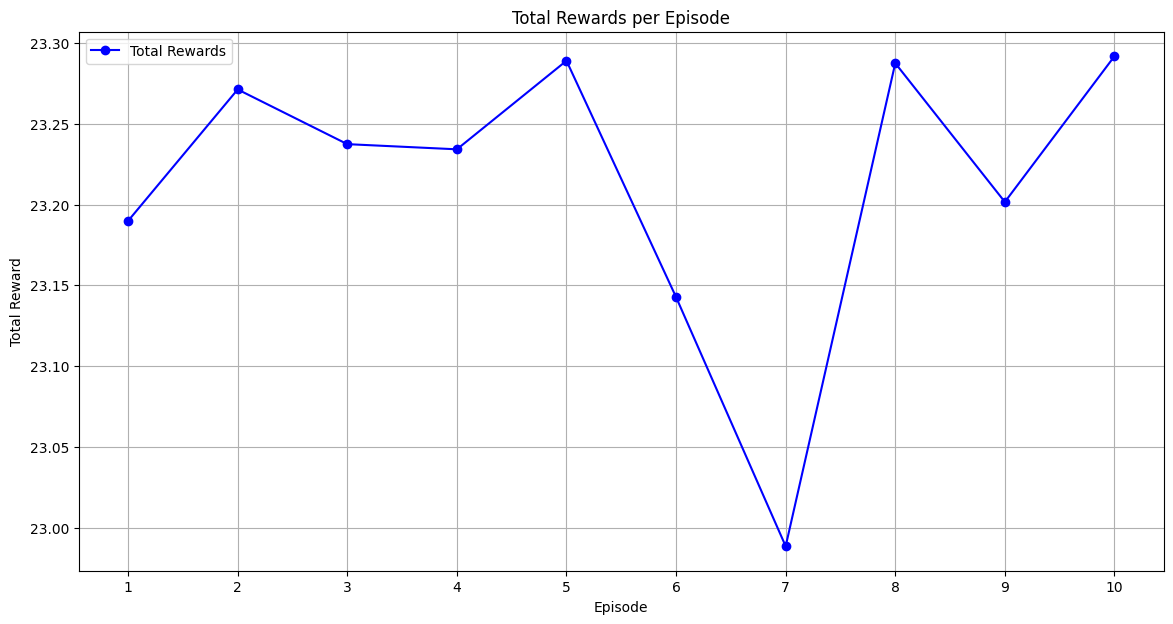

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


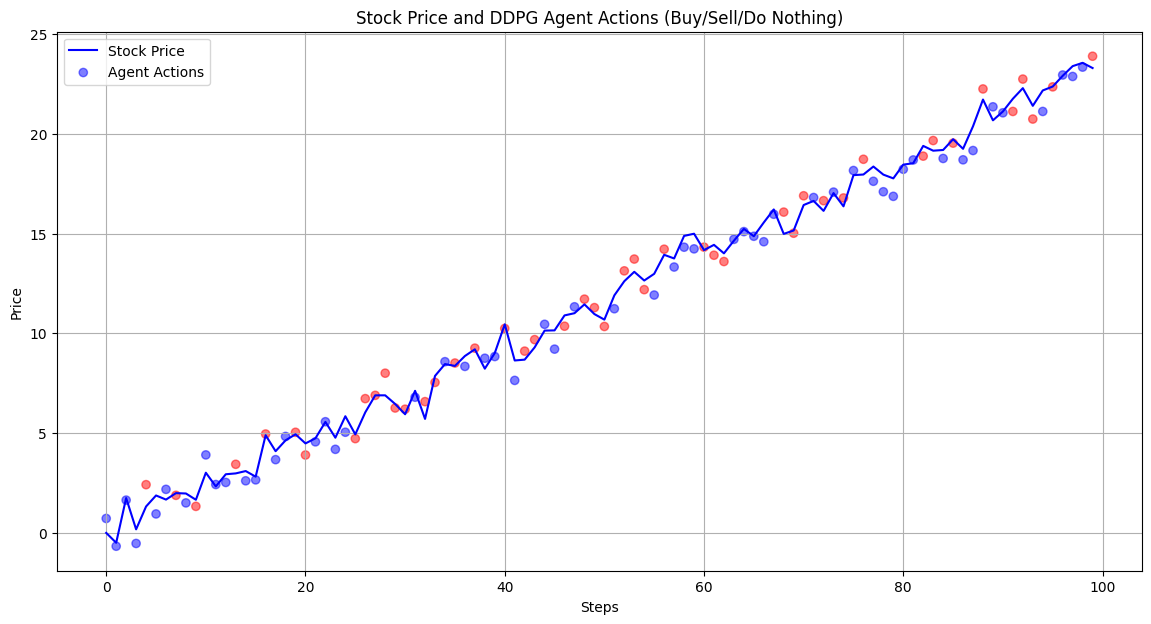

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from collections import deque
from keras import layers, models

data = pd.read_csv('/content/apple_processed.csv')

# DDPG Agent class (remains unchanged)
class DDPGAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.99  # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.actor = self.build_actor()
        self.critic = self.build_critic()

    def build_actor(self):
        model = models.Sequential()
        model.add(layers.Input(shape=(self.state_size,)))  # Input shape
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dense(self.action_size, activation='tanh'))  # Action between -1 and 1
        model.compile(optimizer='adam', loss='mean_squared_error')  # Compile the model with loss
        return model

    def build_critic(self):
        model = models.Sequential()
        model.add(layers.Input(shape=(self.state_size + self.action_size,)))  # Input shape
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dense(1))  # Single value for Q-value
        model.compile(optimizer='adam', loss='mean_squared_error')  # Compile the model with loss
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.uniform(-1, 1, self.action_size)  # Random action
        action_values = self.actor.predict(state)
        return action_values[0]

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return

        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target += self.gamma * self.critic.predict(np.concatenate((next_state, action.reshape(1, -1)), axis=1))[0]
            target_f = self.critic.predict(np.concatenate((state, action.reshape(1, -1)), axis=1))
            target_f[0][0] = target
            self.critic.fit(np.concatenate((state, action.reshape(1, -1)), axis=1), target_f, epochs=1, verbose=0)

            action_values = self.actor.predict(state)
            action_values[0] = action
            self.actor.fit(state, action_values, epochs=1, verbose=0)

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Training the DDPG Agent
def train_ddpg(agent, episodes, data):
    rewards = []  # To store total rewards for each episode
    for e in range(episodes):
        state = data[['Open', 'Close', 'High', 'Low']].iloc[0].values.reshape(1, -1)
        total_reward = 0
        for t in range(1, len(data)):
            action = agent.act(state)  # Get action from the agent
            price_change = action * np.random.uniform(0.1, 0.5)  # Simulated price change is smaller for smoother changes
            data.loc[t, 'Close'] += price_change  # Update the close price
            reward = data.loc[t, 'Close'] - data.loc[t - 1, 'Close']  # Reward as price change
            next_state = data[['Open', 'Close', 'High', 'Low']].iloc[t].values.reshape(1, -1)
            done = t == len(data) - 1  # End of episode
            agent.remember(state, action, reward, next_state, done)  # Store experience
            state = next_state  # Move to the next state
            total_reward += reward  # Update total reward

        if len(agent.memory) > 32:
            agent.replay(32)  # Train on past experiences

        rewards.append(total_reward)  # Store the total reward for this episode
        print(f"Episode: {e + 1}/{episodes}, Total Reward: {total_reward:.2f}")
        def predict_next_week(agent, env, current_price, days=7):
            predicted_prices = []
            state = np.reshape(current_price, [1, 1])  # Reshape current price

            for _ in range(days):
                action = agent.act(state)  # Get action from the agent
                next_state, reward, done = env.step(action)  # Step in the environment
                predicted_prices.append(next_state)  # Store predicted price
                state = np.reshape(next_state, [1, 1])  # Update state

            return predicted_prices
    return rewards

# Parameters for training
state_size = 4  # Open, Close, High, Low prices
action_size = 1  # Price change
agent = DDPGAgent(state_size, action_size)

# Train the agent with 10 episodes and collect rewards
rewards = train_ddpg(agent, episodes=10, data=data)

# Plotting the total rewards for each episode
plt.figure(figsize=(14, 7))
plt.plot(range(1, len(rewards) + 1), rewards, label='Total Rewards', color='blue', marker='o')
plt.title('Total Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.xticks(range(1, len(rewards) + 1))  # Set x-ticks for each episode
plt.legend()
plt.grid()
plt.show()

# Visualizing the stock price and agent actions
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Stock Price', color='blue')

actions = []
state = data[['Open', 'Close', 'High', 'Low']].iloc[0].values.reshape(1, -1)  # Initialize the first state

for t in range(len(data)):
    action = agent.act(state)  # Get action from the agent
    actions.append(action[0])  # Append action (price change) to actions list

    # Simulate the next state based on the action taken with smaller increments
    price_change = action * np.random.uniform(0.1, 0.5)  # Smaller price change for smoother transitions
    data.loc[t, 'Close'] += price_change  # Update the close price

    # Prepare the next state
    if t + 1 < len(data):
        state = data[['Open', 'Close', 'High', 'Low']].iloc[t + 1].values.reshape(1, -1)

# Add random jitter to the y-values of the agent's actions for better visibility
jitter = np.random.normal(0, 0.5, size=len(actions))

# Convert actions to colors for visualization (Buy, Sell, Do Nothing)
plt.scatter(data.index, data['Close'] + jitter,
            c=['red' if a > 0 else 'blue' if a < 0 else 'green' for a in actions],
            label='Agent Actions', alpha=0.5)

plt.title('Stock Price and DDPG Agent Actions (Buy/Sell/Do Nothing)')
plt.xlabel('Steps')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()
